- The prognostic variable “V” is calculated with time step of “n” following the below equation: $$V_{n+1}= \frac{21}{8} V_n − \frac{28}{8} V_n^3$$ knowing that n = 0, 1, 2, ...
- In the control calculation, V(0) = 0.1. 
- Perturb the initial condition V(0) and examine the difference in time between the control and the perturbation runs. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Set two initial values for two trajectories as 0.1 and 0.10001 to see how it reacts to minor different starting conditions.

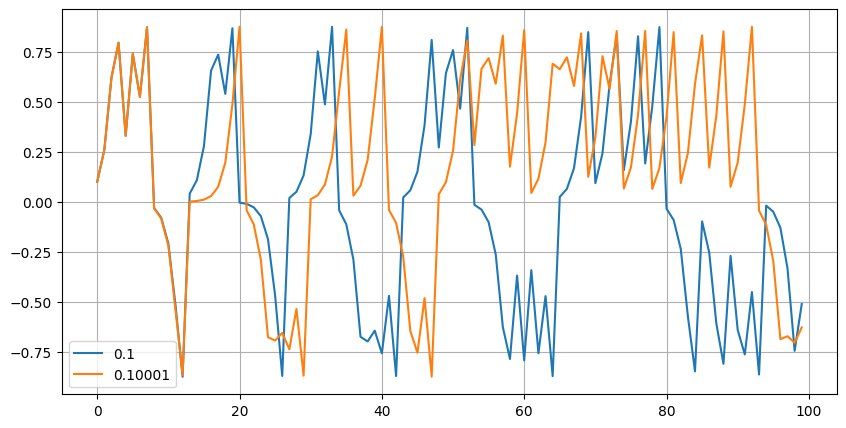

In [2]:
n = np.arange(0,100,1)
V1 = np.zeros(len(n))
V2 = np.zeros(len(n))

V1[0] = 0.1
for i in range (0,len(n)-1):
    V1[i+1] = (21/8) * V1[i] - (28/8) * V1[i]**3

V2[0] = 0.10001
for i in range (0,len(n)-1):
    V2[i+1] = (21/8) * V2[i] - (28/8) * V2[i]**3

plt.figure(figsize=(10,5))
plt.plot(n, V1, label = '0.1')
plt.plot(n, V2, label = '0.10001')
plt.grid(True)
plt.legend()

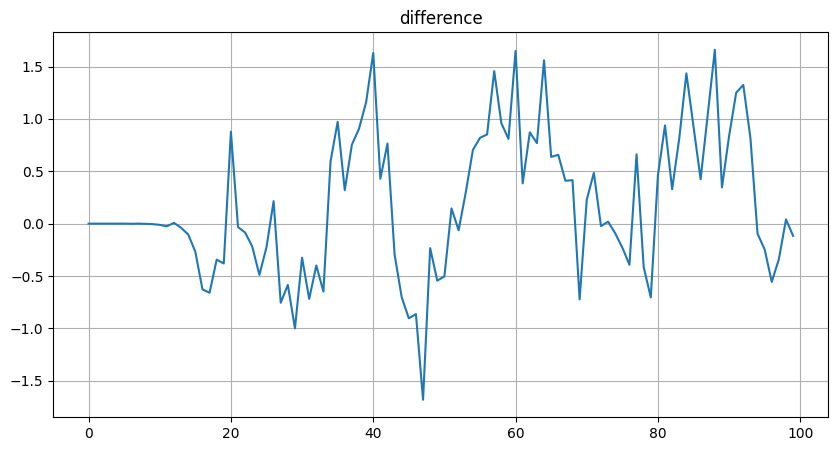

In [3]:
plt.figure(figsize=(10,5))
plt.title('difference')
plt.plot(n, V2 - V1)
plt.grid(True)

It can be seen that the two curves overlay at the beginning, with difference = 0. But after about 10 iterations, it starts to change and the difference curve starts to fluctuate a lot. This demonstrates that a minor variation in the starting conditions can result in significant differences in the outcomes.

Solve Lorenz equations $$\frac{dx}{dt} = P(y-x)$$ $$\frac{dy}{dt} = Rx - y - xz$$ $$\frac{dz}{dt} = xy - Bz$$ where P = 10, R = 28, B = 8/3, x[0]=1, y [0]=1, z [0] = 1, dt = 0.01, 10000 time steps.

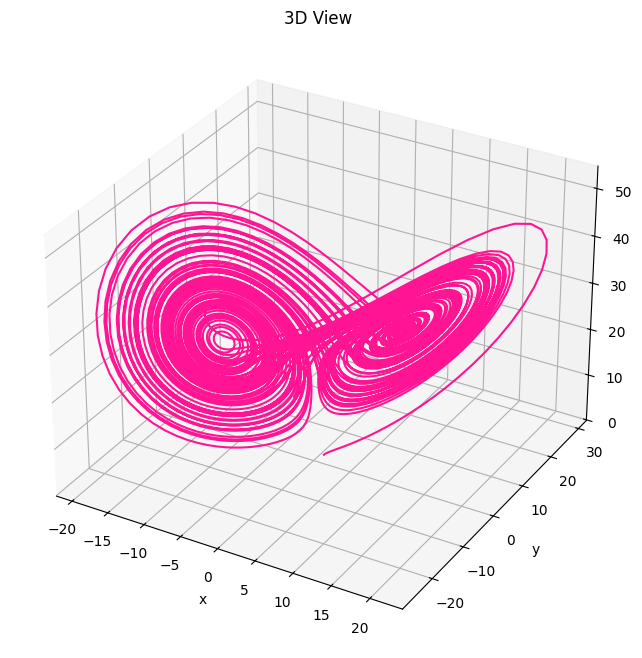

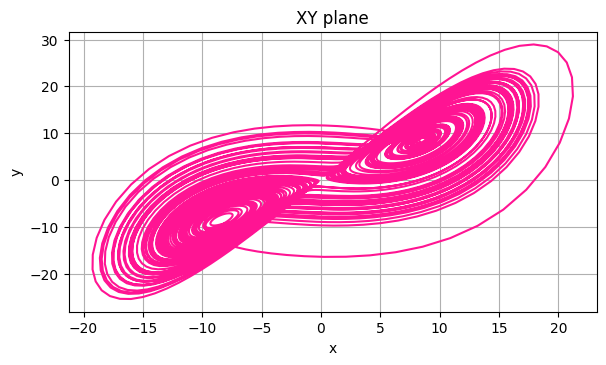

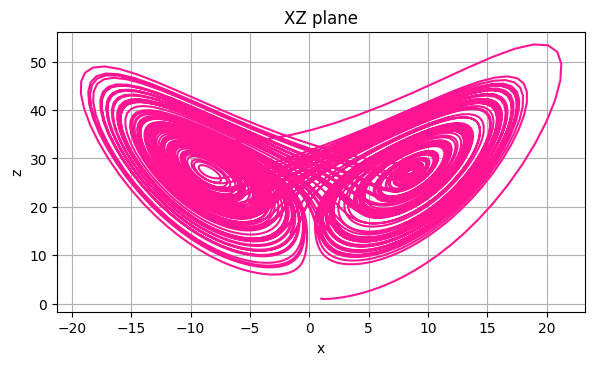

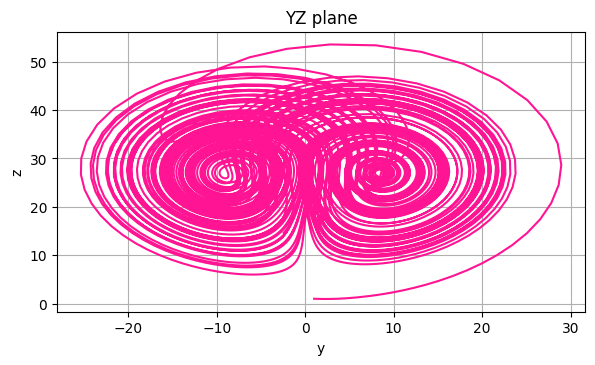

In [4]:
dt = 0.01
num_steps = 10000

x = np.zeros(10000)
y = np.zeros(10000)
z = np.zeros(10000)

def lorenz(xyz, p = 10, r = 28, b = 8/3):
    x, y, z = xyz
    x_dot = p*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

xyzs = np.empty((num_steps + 1, 3)) 
xyzs[0] = (1, 1, 1) 

for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.plot(*xyzs.T, color = 'deeppink')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D View')
ax.grid(True)

ax1 = plt.figure(figsize=(15,8)).add_subplot(2, 2, 2)
ax1.plot(xyzs[:,0], xyzs[:,1], color = 'deeppink')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('XY plane')
ax1.grid(True)

ax2 = plt.figure(figsize=(15,8)).add_subplot(2, 2, 3)
ax2.plot(xyzs[:,0], xyzs[:,2], color = 'deeppink')
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('XZ plane')
ax2.grid(True)

ax3 = plt.figure(figsize=(15,8)).add_subplot(2, 2, 4)
ax3.plot(xyzs[:,1], xyzs[:,2], color = 'deeppink')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('YZ plane')
ax3.grid(True)

The outcome has a double-spiral form. The coordinates seem to move in trajectories that is spiraling around two points, create two wings, create a peculiar and distinctive shape.

Change the initial conditions slightly different to (1.0001, 1.0001, 1.0001).

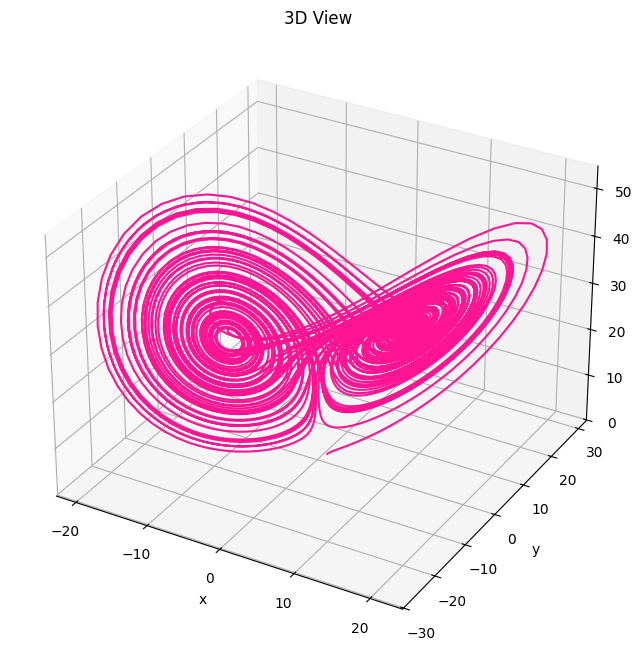

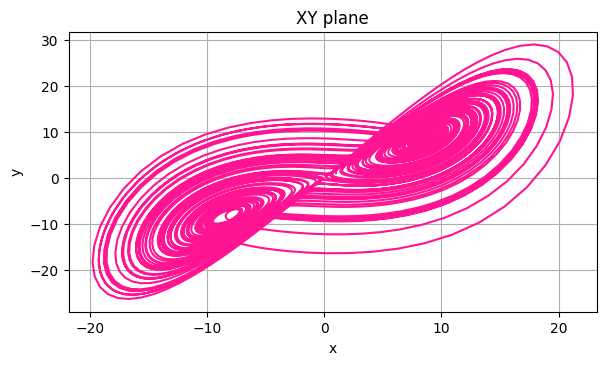

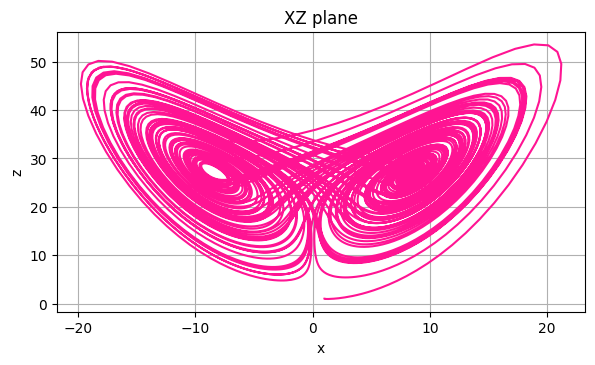

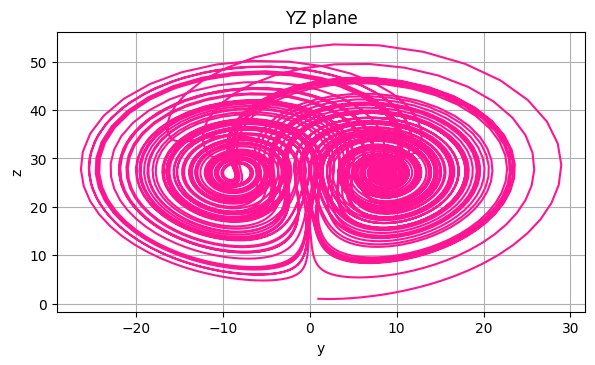

In [5]:
xyzs2 = np.empty((num_steps + 1, 3))  
xyzs2[0] = (1.0001, 1.0001, 1.0001)  

for i in range(num_steps):
    xyzs2[i + 1] = xyzs2[i] + lorenz(xyzs2[i]) * dt

ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.plot(*xyzs2.T, color = 'deeppink')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D View')
ax.grid(True)

ax1 = plt.figure(figsize=(15,8)).add_subplot(2, 2, 2)
ax1.plot(xyzs2[:,0], xyzs2[:,1], color = 'deeppink')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('XY plane')
ax1.grid(True)

ax2 = plt.figure(figsize=(15,8)).add_subplot(2, 2, 3)
ax2.plot(xyzs2[:,0], xyzs2[:,2], color = 'deeppink')
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('XZ plane')
ax2.grid(True)

ax3 = plt.figure(figsize=(15,8)).add_subplot(2, 2, 4)
ax3.plot(xyzs2[:,1], xyzs2[:,2], color = 'deeppink')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('YZ plane')
ax3.grid(True)

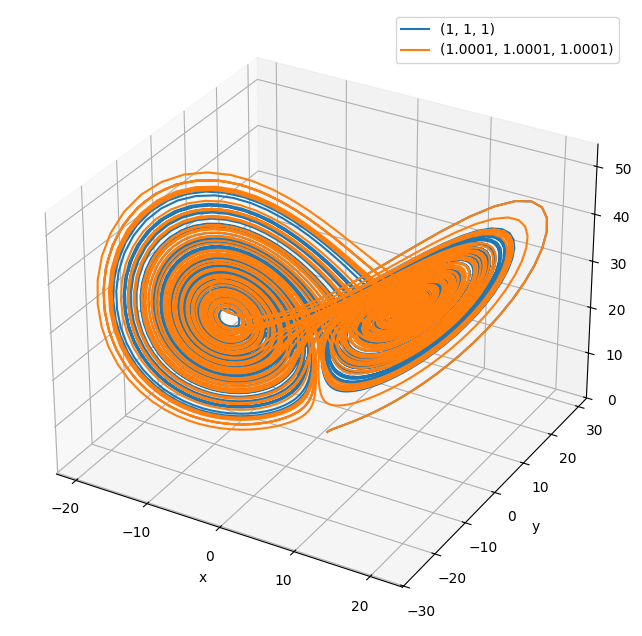

In [6]:
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.plot(*xyzs.T, label = '(1, 1, 1)')
ax.plot(*xyzs2.T, label = '(1.0001, 1.0001, 1.0001)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid(True)
ax.legend()

It can be seen that the two curves do not totally overlay.

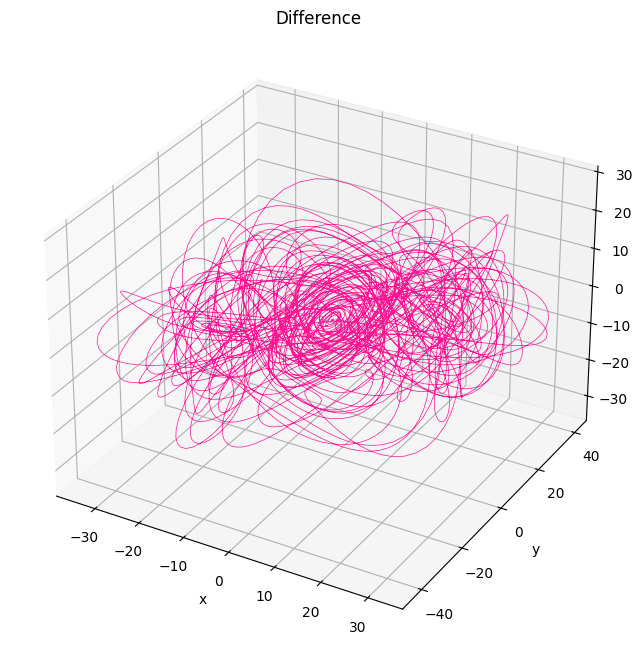

In [7]:
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.plot(xyzs2[:,0] - xyzs[:,0], xyzs2[:,1] - xyzs[:,1], xyzs2[:,2] - xyzs[:,2], color = 'deeppink', linewidth = 0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Difference')
ax.grid(True)

When the initial condition changes just a little bit, the outcome leads to a significant shift.

![](idk.png)

I use fourth-order Runge-Kutta method. For each step, computes four intermediate slopes and update the next state using weighted average of these slopes.

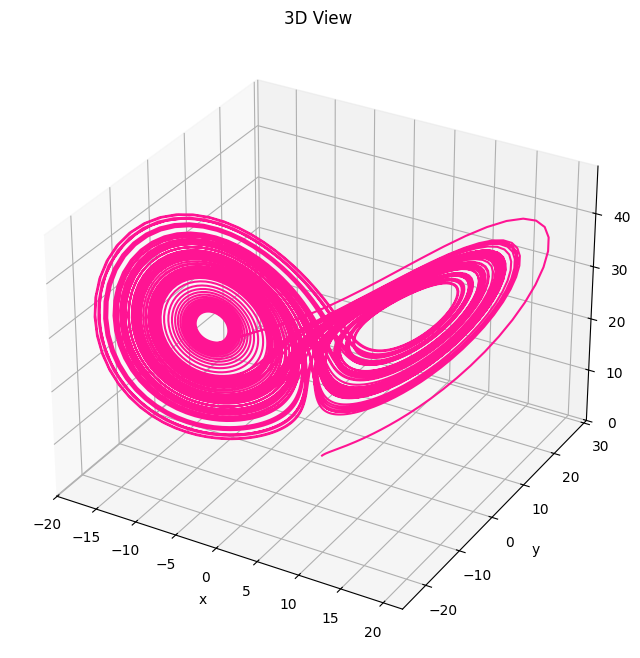

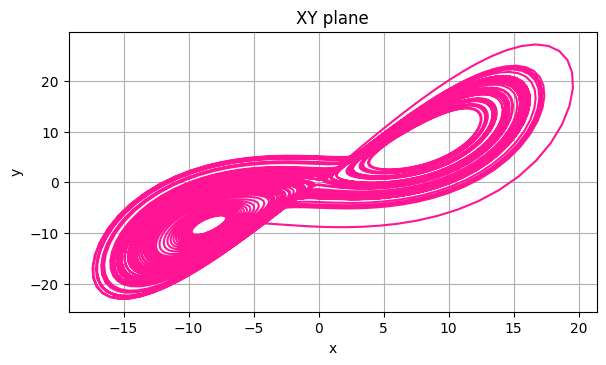

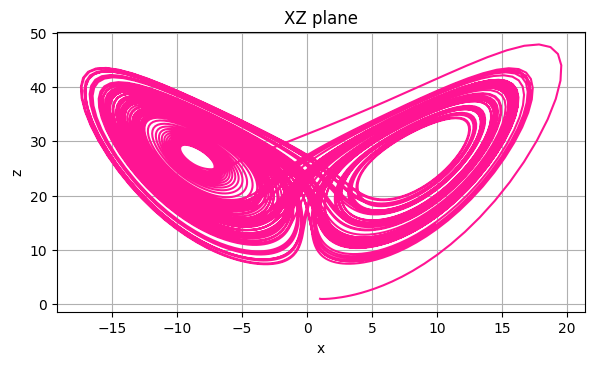

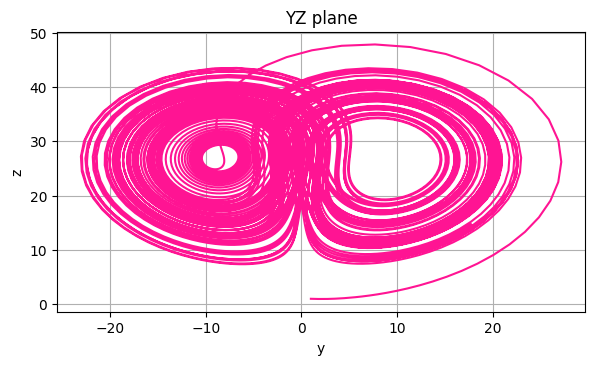

In [8]:
xyzs3 = np.empty((num_steps + 1, 3))
xyzs3[0] = (1, 1, 1)

for i in range(num_steps):
    k1 = lorenz(xyzs3[i])
    k2 = lorenz(xyzs3[i] + k1 * dt/2)
    k3 = lorenz(xyzs3[i] + k2 * dt/2)
    k4 = lorenz(xyzs3[i] + k3 * dt)
    xyzs3[i + 1] = xyzs3[i] + (k1 + 2*k2 + 2*k3 + k4) * dt/6

ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.plot(*xyzs3.T, color = 'deeppink')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D View')
ax.grid(True)

ax1 = plt.figure(figsize=(15,8)).add_subplot(2, 2, 2)
ax1.plot(xyzs3[:,0], xyzs3[:,1], color = 'deeppink')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('XY plane')
ax1.grid(True)

ax2 = plt.figure(figsize=(15,8)).add_subplot(2, 2, 3)
ax2.plot(xyzs3[:,0], xyzs3[:,2], color = 'deeppink')
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('XZ plane')
ax2.grid(True)

ax3 = plt.figure(figsize=(15,8)).add_subplot(2, 2, 4)
ax3.plot(xyzs3[:,1], xyzs3[:,2], color = 'deeppink')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('YZ plane')
ax3.grid(True)

The overall shape are the same as Euler, but this one is missing some information in the middle of the right wing.

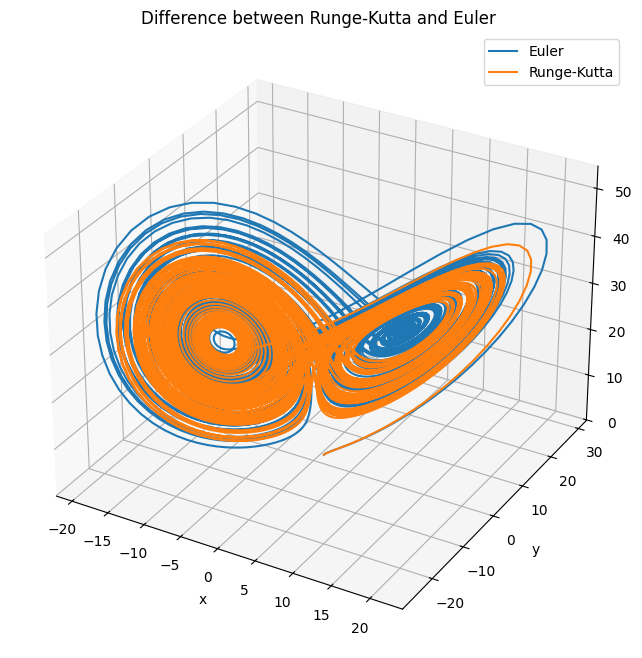

In [9]:
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.plot(*xyzs.T, label = 'Euler')
ax.plot(*xyzs3.T, label = 'Runge-Kutta')
ax.set_title('Difference between Runge-Kutta and Euler')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid(True)
ax.legend()

It can be seen that the Runge-Kutta wings are smaller than Euler.

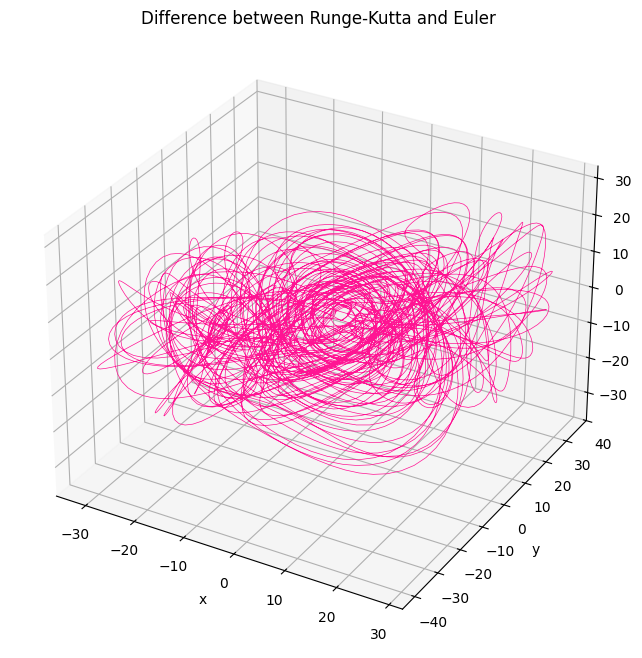

In [10]:
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.plot(xyzs3[:,0] - xyzs[:,0], xyzs3[:,1] - xyzs[:,1], xyzs3[:,2] - xyzs[:,2], color = 'deeppink', linewidth = 0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Difference between Runge-Kutta and Euler')
ax.grid(True)

Display the Bifurcation Diagrams of the Verhulst model. $$x_{n+1} = a \cdot x_n \cdot (1-x_n)$$

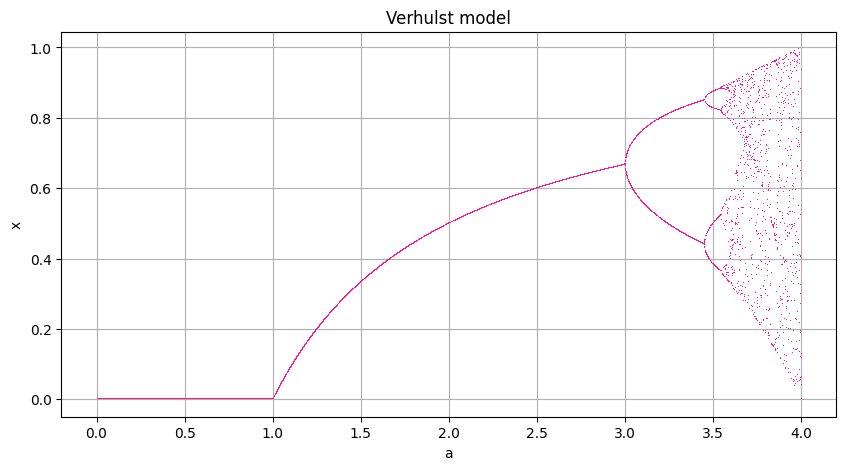

In [11]:
n=1000
aspace = np.linspace(0, 4, 10000)
A=[]
X=[]

for a in aspace:
    A.append(a)
    x=np.random.random()
    for j in range(n):
        x = a*x*(1-x)
    X.append(x)

plt.figure(figsize=(10,5))
plt.title('Verhulst model')
plt.plot(A, X, linestyle='', marker=',', color='deeppink')
plt.xlabel('a')
plt.ylabel('x')
plt.grid(True)

For a in range (0,1), it can be seen that the outcome is 0. When a is from 1 to 3, the curve seems to be some kind of a stable fixed function of a. When a in range 3 to nearly 3.5, x converges to two branches and when a larger than 3.5, the value points fill almost the whole region. It can be concluded that small changes in the parameter a lead to highly unpredictable behavior of the variable x.

- Such small variation in starting condition can lead to a significant shift in the outcome, this is reminiscent of the "Butterfly Effect".
- When calculating Lorenz equations, the Runge-Kutta method's wings are smaller than Euler method's.
- Slightly changing one parameter can switch a system from predictable to chaotic.
- Together, these practices highlight the nature of chaos in mathematical models.